In [0]:
## this program in written and run in google colab environment with GPU support
##Author:Tanvir Rahman

In [2]:
#install the tensorflow gpu version and import the module
!pip install tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

In [0]:
## import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [0]:
## import the data from directly with keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


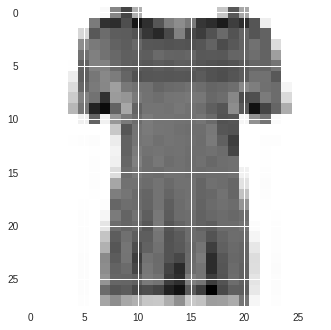

In [6]:
## showing a sample of data and plot
plt.imshow(x_train[10])

In [7]:
print(y_train[10])

0


In [0]:
### first import module 
### second import the data
### we use nural network lso we have to normalize the data
# it is for understanding the model accurately
## and dense layer cant work with non floating value

### we can do it with keras utils normalize axis1
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

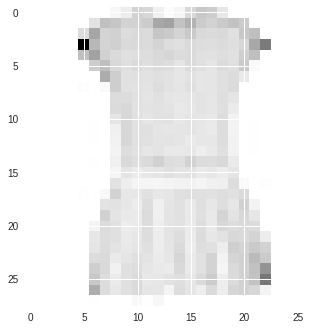

In [9]:
plt.imshow(x_train[3])

In [10]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
## we will map this thing after
d={'Top':0,'Trouser':1,'Pullover':2,'Dress':3,'Coat':4,'Sandal':5,'Shirt':6,'Sneaker':7,'Bag':8,'Ankle_boot':9}

In [0]:
label=np.array(['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle_boot'])

In [0]:
def Sub (myarr, label_array) :
    return label_array[myarr] 

## lets under stand thing function
## the array of label which has the name and the my arrya has the list of elements 
## number 
## when we label[y_train]
## suposse the y_train has [0,3,0,0,0]
## label[y_train] gives
## label[0] => 'Top'
## label[3] => Dress
## label[0] => 'Top'
## label[0] => 'Top'
## label[0] => 'Top'

## so we got['Top','Dress''Top','Top','Top']

## we can do it with map in pandas


In [0]:
encoding_label = Sub(y_train,label)

In [15]:
encoding_label

array(['Ankle_boot', 'Top', 'Top', ..., 'Dress', 'Top', 'Sandal'],
      dtype='<U10')

In [0]:
def data_example():
  data=np.random.randint(0,10)
  plt.imshow(x_train[data])
  print(encoding_label[data])

Sandal


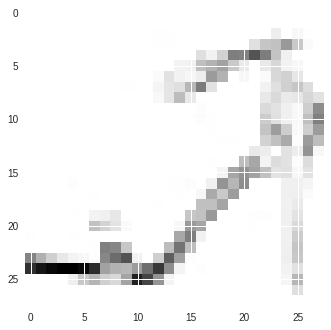

In [17]:
data_example()

In [0]:
### creating model
## what is flatten layer
  ## when we got two dimensional data to make itself suitable for input
  ## we change it to one-dimensional this is called flatten
  ## loss 'sparse_categorical_crossentropy' is the log version of the loss
  ## especially max likelyhood estimation
  ## adam optimization is the combined of the adagrad and momentam optimization
  ## book:tensorflow for dummies

In [0]:
## we are adding sequental model nor convnet

model = tf.keras.models.Sequential() ## making th sequental model
## add layer we have to change the shape with flatten
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
## final will be softmax and 10 cause data will be 10 catagory
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


## added layers perceptron activation function
## adding optimizer and loss and metrics of the 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 10s 167us/sample - loss: 0.4953 - accuracy: 0.8166
Epoch 2/20
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3652 - accuracy: 0.8639
Epoch 3/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3300 - accuracy: 0.8772
Epoch 4/20
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3073 - accuracy: 0.8852
Epoch 5/20
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2891 - accuracy: 0.8910
Epoch 6/20
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2719 - accuracy: 0.8972
Epoch 7/20
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2603 - accuracy: 0.9026
Epoch 8/20
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2498 - accuracy: 0.9054
Epoch 9/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2386 - accuracy: 0.9100
Epoch 10/20
60000/6

In [21]:
loss,acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.3615 - accuracy: 0.8888


In [22]:
print ("Loss : "+str(loss))
print ("Accuracy : "+str(acc))

Loss : 0.3614506610095501
Accuracy : 0.8888


In [0]:
## test predict and 
import numpy as np

## we have to pass the whole array then we find it with argmax

prediction=model.predict([x_test])

7
Sandal


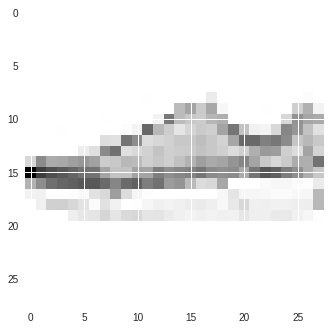

In [24]:
data=np.random.randint(0,10)
print (np.argmax(prediction[data]))
print (encoding_label[data])
plt.imshow(x_test[data])

In [0]:
## not doing good we have to use the convnet model